# III. Fourth Task  👨‍💻: Models Building

**1. Decision Trees   
2. XGBoost Classifier**

In [167]:
#!pip install optuna

In [168]:
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

import xgboost as xgb
from xgboost import XGBClassifier

# import packages for hyperparameters tuning
import optuna
from optuna import create_study
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


# settings & warning handling
import warnings
pd.options.display.max_columns
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [169]:
# read in csv file as a DataFrame

data             = pd.read_csv("Prepared_Dataset.csv", index_col=0)
X_full           = pd.read_csv("X_full.csv", index_col=0)
X_chi2_best      = pd.read_csv("X_chi2_best.csv", index_col=0)
X_best_mi_scores = pd.read_csv("X_best_mi_scores.csv", index_col=0)
X_pca_final      = pd.read_csv("X_pca_final.csv", index_col=0)
X_best_features  = pd.read_csv("X_best_features.csv", index_col=0)

In [170]:
X_full.drop('MonthsDelinquent', axis=1, inplace=True)
X_full.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MSA', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM',
       'PropertyState', 'PropertyType', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'MonthsInRepayment',
       'FirstPayment_Year', 'FirstPayment_Month', 'Maturity_Year',
       'Maturity_Month', 'LTV_range', 'Credit_range', 'YearsInRepayment',
       'Repay_range', 'IsFirstTimeHomebuyer', 'Duration'],
      dtype='object')

In [171]:
X_full.shape, X_pca_final.shape, X_chi2_best.shape, X_best_mi_scores.shape, X_best_features.shape

((291449, 31), (291449, 12), (291449, 15), (291449, 15), (291449, 14))

In [172]:
y = data['EverDelinquent']

In [173]:
y.value_counts()

0    233787
1     57662
Name: EverDelinquent, dtype: int64

In [174]:
X_full.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,FirstPayment_Year,FirstPayment_Month,Maturity_Year,Maturity_Month,LTV_range,Credit_range,YearsInRepayment,Repay_range,IsFirstTimeHomebuyer,Duration
0,711.841009,0,16974,25,1,0,89,27.0,117000,89.0,...,1999,2,2029,1,0,0,4.333333,2,0,30
1,711.841009,0,19740,0,1,0,73,17.0,109000,73.0,...,1999,2,2029,1,0,0,12.000000,4,0,30
2,711.841009,0,29940,0,1,0,75,16.0,88000,75.0,...,1999,2,2029,1,0,0,5.583333,2,0,30
3,711.841009,0,31084,0,1,0,76,14.0,160000,76.0,...,1999,2,2029,1,0,0,2.916667,1,0,30
4,711.841009,0,35644,0,1,0,78,18.0,109000,78.0,...,1999,2,2029,1,0,0,4.500000,2,0,30


# Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split().

In [175]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.2, random_state=42) # 70% training and 30% test

In [176]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((233159, 14), (58290, 14))

# 1. Decision Tree Algorithm

Let's create a decision tree model using Scikit-learn

## Define the DT model

In [146]:
# Create Decision Tree classifer object
d_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

# Train Decision Tree Classifer
d_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

## Predictions on test set

In [147]:
# Predict test set results
y_pred_tree = d_tree_model.predict(X_test)

In [148]:
# Check accuracy score 
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_tree)))

Model accuracy score with criterion entropy: 0.8123


We got a classification rate of 81.13%, which is considered as good accuracy. We can improve this accuracy by tuning the parameters in the decision tree algorithm.

## Check for overfitting and underfitting

In [149]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on train:", accuracy_score(d_tree_model.predict(X_train), y_train))
print("Accuracy on test:",  accuracy_score(y_test, y_pred_tree))

Accuracy on train: 0.8129216543217289
Accuracy on test: 0.8123348773374507


Here, the training-set accuracy score is 81.24 while the test-set accuracy to be 81.13. These two values are quite comparable. So, there is no sign of overfitting.

## Classification Report

Classification report evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [150]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     46694
           1       0.63      0.14      0.23     11596

    accuracy                           0.81     58290
   macro avg       0.72      0.56      0.56     58290
weighted avg       0.78      0.81      0.76     58290



## Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model.  

In [151]:
cm = confusion_matrix(y_test, y_pred_tree)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[45747   947]
 [ 9992  1604]]


# XGBoost Classifier

In [152]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X_best_features, label=y)
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)
cls_weight

4.061411887292146

In [153]:
# parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators':100,
            #'scale_pos_weight': cls_weight
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [154]:
# parameters of the xgb trained model as follows -
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)


In [155]:
# make predictions on test data
y_pred_xgb = xgb_clf.predict(X_test)

In [156]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))

XGBoost model accuracy score: 0.8115


## Classification Report

In [157]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     46694
           1       0.63      0.13      0.21     11596

    accuracy                           0.81     58290
   macro avg       0.72      0.56      0.55     58290
weighted avg       0.78      0.81      0.76     58290



## k-fold Cross Validation

In [158]:
from xgboost import cv



params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 8, 'alpha': 10, 'scale_pos_weight':cls_weight}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [159]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.588107,0.000572,0.572322,0.000917
1,0.656778,0.054034,0.647801,0.057970
2,0.676503,0.043823,0.670375,0.046345
3,0.707955,0.023619,0.702076,0.025648
4,0.719955,0.016226,0.714162,0.017303


## Feature importance

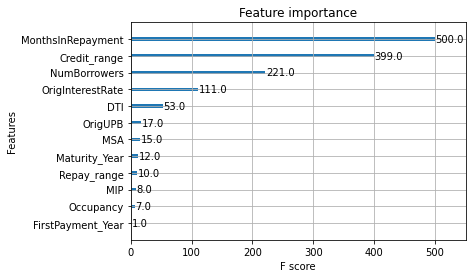

<Figure size 1152x864 with 0 Axes>

In [160]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

# Hyperparameters optimization for XGBoost

In [161]:
# Define the objective function for optimization
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',  # Logarithmic loss for binary classification
        'verbosity': 0,
        'n_jobs': -1,  # Use all available CPU cores
        'seed': 42,
        'tree_method': 'hist',  # You can try different tree methods
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e2),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),  # Adjust this parameter for class imbalance
   
        #'n_estimators': 180,
    }

    # Create the XGBoost model
    model = XGBClassifier(**params)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy as the metric to optimize
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [162]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Perform hyperparameter optimization
n_trials = 100  # You can adjust the number of trials
study.optimize(objective, n_trials=n_trials)

[I 2023-09-12 02:16:24,648] A new study created in memory with name: no-name-c4ef2424-b762-4ffc-81a2-e08222ec4766
[I 2023-09-12 02:16:26,587] Trial 0 finished with value: 0.5218905472636816 and parameters: {'learning_rate': 0.0017424530540386684, 'max_depth': 4, 'min_child_weight': 8.206577700280047, 'subsample': 0.832276395302567, 'colsample_bytree': 0.6743220891279966, 'gamma': 0.14691029147742105, 'reg_alpha': 0.0013916857757647835, 'reg_lambda': 0.03449757511653558, 'scale_pos_weight': 6.077968186222995}. Best is trial 0 with value: 0.5218905472636816.
[I 2023-09-12 02:16:31,637] Trial 1 finished with value: 0.8005661348430263 and parameters: {'learning_rate': 0.06989996158843763, 'max_depth': 12, 'min_child_weight': 0.00051247276667691, 'subsample': 0.9307363365323239, 'colsample_bytree': 0.6172456277223206, 'gamma': 0.011512965108556728, 'reg_alpha': 0.08083998937341189, 'reg_lambda': 0.000510820019365767, 'scale_pos_weight': 1.8383969015512733}. Best is trial 1 with value: 0.800

[I 2023-09-12 02:17:42,838] Trial 18 finished with value: 0.7094012695144964 and parameters: {'learning_rate': 0.00915139660958681, 'max_depth': 5, 'min_child_weight': 0.002137611588361973, 'subsample': 0.5914678179641739, 'colsample_bytree': 0.9282963591586176, 'gamma': 3.362234832629675e-05, 'reg_alpha': 0.041005852124783776, 'reg_lambda': 0.000153412164342959, 'scale_pos_weight': 4.038588581137055}. Best is trial 10 with value: 0.813690169840453.
[I 2023-09-12 02:17:46,354] Trial 19 finished with value: 0.7795505232458397 and parameters: {'learning_rate': 0.0053842287958284435, 'max_depth': 9, 'min_child_weight': 0.003581042568840109, 'subsample': 0.5710918884187477, 'colsample_bytree': 0.856485525697207, 'gamma': 6.217416753913989e-06, 'reg_alpha': 0.17998574887986768, 'reg_lambda': 1.7950085451793332e-05, 'scale_pos_weight': 2.5401301166169237}. Best is trial 10 with value: 0.813690169840453.
[I 2023-09-12 02:17:48,791] Trial 20 finished with value: 0.7907702864985418 and paramete

[I 2023-09-12 02:18:31,742] Trial 36 finished with value: 0.7700977869274318 and parameters: {'learning_rate': 0.06048739517095716, 'max_depth': 9, 'min_child_weight': 90.9751497600175, 'subsample': 0.5317314460127415, 'colsample_bytree': 0.9218946704862775, 'gamma': 1.52950436580713e-06, 'reg_alpha': 0.22636988797983978, 'reg_lambda': 0.0008934041024726652, 'scale_pos_weight': 2.5386358134913425}. Best is trial 22 with value: 0.8140504374678332.
[I 2023-09-12 02:18:34,960] Trial 37 finished with value: 0.8096242923314462 and parameters: {'learning_rate': 0.07269255676587186, 'max_depth': 9, 'min_child_weight': 0.007740759241185022, 'subsample': 0.634751328152926, 'colsample_bytree': 0.8047887460773102, 'gamma': 1.0792643883027721e-06, 'reg_alpha': 0.044252082920065654, 'reg_lambda': 5.2464136204651295e-05, 'scale_pos_weight': 1.4274705403975054}. Best is trial 22 with value: 0.8140504374678332.
[I 2023-09-12 02:18:39,496] Trial 38 finished with value: 0.785331960885229 and parameters:

[I 2023-09-12 02:19:29,390] Trial 55 finished with value: 0.8141190598730486 and parameters: {'learning_rate': 0.050943831508208734, 'max_depth': 5, 'min_child_weight': 0.022808615996357025, 'subsample': 0.5624045651732952, 'colsample_bytree': 0.9398370763995869, 'gamma': 7.629596680072441e-06, 'reg_alpha': 0.0023408684648108555, 'reg_lambda': 1.7221148500368797e-06, 'scale_pos_weight': 1.009989774251616}. Best is trial 41 with value: 0.81417052667696.
[I 2023-09-12 02:19:31,557] Trial 56 finished with value: 0.8043746783324756 and parameters: {'learning_rate': 0.061847086136312436, 'max_depth': 5, 'min_child_weight': 0.020831518336970528, 'subsample': 0.56419370252185, 'colsample_bytree': 0.9292511710806478, 'gamma': 9.035648477399822e-06, 'reg_alpha': 0.001738540206885892, 'reg_lambda': 1.614314560316141e-06, 'scale_pos_weight': 1.7475819590469979}. Best is trial 41 with value: 0.81417052667696.
[I 2023-09-12 02:19:33,954] Trial 57 finished with value: 0.8104820723966375 and paramete

[I 2023-09-12 02:20:21,145] Trial 74 finished with value: 0.8010121804769257 and parameters: {'learning_rate': 0.06383109307389159, 'max_depth': 5, 'min_child_weight': 6.179908456234618, 'subsample': 0.5115566985359632, 'colsample_bytree': 0.9655324282608037, 'gamma': 4.359341203116227e-06, 'reg_alpha': 0.00048041032002384305, 'reg_lambda': 6.261272177561763e-06, 'scale_pos_weight': 1.8445319416618045}. Best is trial 41 with value: 0.81417052667696.
[I 2023-09-12 02:20:23,265] Trial 75 finished with value: 0.7885915251329559 and parameters: {'learning_rate': 0.08277522394240544, 'max_depth': 5, 'min_child_weight': 42.71375183346991, 'subsample': 0.5485024471092627, 'colsample_bytree': 0.9891216994132234, 'gamma': 7.865064042387875e-06, 'reg_alpha': 0.003498081384736373, 'reg_lambda': 2.2282363155405576e-06, 'scale_pos_weight': 2.153554815019479}. Best is trial 41 with value: 0.81417052667696.
[I 2023-09-12 02:20:25,685] Trial 76 finished with value: 0.8115457196774747 and parameters: {

[I 2023-09-12 02:21:19,006] Trial 92 finished with value: 0.8134499914221993 and parameters: {'learning_rate': 0.02226718683312691, 'max_depth': 8, 'min_child_weight': 0.02549216843514992, 'subsample': 0.5227854355832883, 'colsample_bytree': 0.9548795358204011, 'gamma': 2.8148287590777127e-06, 'reg_alpha': 0.0023922349457749428, 'reg_lambda': 1.3258178629249518e-06, 'scale_pos_weight': 1.0123365583184674}. Best is trial 41 with value: 0.81417052667696.
[I 2023-09-12 02:21:22,259] Trial 93 finished with value: 0.8101732715731687 and parameters: {'learning_rate': 0.02459932781385354, 'max_depth': 8, 'min_child_weight': 0.025888499398323064, 'subsample': 0.5260524244907147, 'colsample_bytree': 0.9715749022102572, 'gamma': 1.970848333299828e-06, 'reg_alpha': 0.002336798085587671, 'reg_lambda': 1.3774613060886483e-06, 'scale_pos_weight': 1.4107685982873661}. Best is trial 41 with value: 0.81417052667696.
[I 2023-09-12 02:21:25,830] Trial 94 finished with value: 0.8020415165551552 and parame

In [163]:
# Print the best hyperparameters and result
best_trial = study.best_trial
print(f"Best trial - Accuracy: {best_trial.value:.4f}")
print("Best trial - Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

Best trial - Accuracy: 0.8142
Best trial - Params: 
    learning_rate: 0.03967678127832989
    max_depth: 5
    min_child_weight: 2.3943784084633166
    subsample: 0.6135916825264203
    colsample_bytree: 0.9515193185531244
    gamma: 2.7103195955996677e-06
    reg_alpha: 0.010882942239348598
    reg_lambda: 1.981672325987931e-06
    scale_pos_weight: 1.0231853204513568


In [164]:
# You can access the best model with the best hyperparameters using study.best_params
best_params = best_trial.params
best_model = xgb.XGBClassifier(**best_params)

In [179]:
# Define the number of folds for StratifiedKFold cross-validation
n_splits = 5  # Adjust as needed

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store cross-validation scores
accuracy_scores = []

# Perform cross-validation
for train_idx, val_idx in kf.split(X_best_features, y):
    X_train, X_val = X_best_features.iloc[train_idx], X_best_features.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Create and train the XGBoost model with the best hyperparameters
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy", accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy (StratifiedKFold): {mean_accuracy:.4f}")


Accuracy 0.8142906158860868
Accuracy 0.8138274146508835
Accuracy 0.8155772859838737
Accuracy 0.8144450162978213
Accuracy 0.8143217416665237
Mean Accuracy (StratifiedKFold): 0.8145


# Making a pipeline with XGBoost model